In [1]:

import numpy as np
import os
import tensorflow as tf


from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image

import sklearn
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

image_folder = "C:/Users/Natalia/Desktop/Data Wizasrd/cats_and_dogs/train/train"

img_size = (128, 128)

# Створюємо порожні списки для зображень і міток
images = []
labels = []

# Завантажуємо зображення
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg'):
        img_path = os.path.join(image_folder, filename)
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img)
        images.append(img_array)
        
        # Визначаємо мітки
        if 'cat' in filename:
            labels.append(0)  # Мітка для котів
        elif 'dog' in filename:
            labels.append(1)  # Мітка для собак

images = np.array(images)
labels = np.array(labels)

# Нормалізація даних
images = images.astype('float32') / 255.0

# Перетворення цільових міток на категоріальний формат
labels = to_categorical(labels, num_classes=2)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Створення моделі заснованої на Sequential
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Тренування моделі
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(X_test, y_test))

# Оцінка точності моделі на тестових даних
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


c:\Users\Natalia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 113s 790ms/step - accuracy: 0.5653 - loss: 0.7354 - val_accuracy: 0.6945 - val_loss: 0.5831
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 92s 674ms/step - accuracy: 0.7131 - loss: 0.5552 - val_accuracy: 0.7423 - val_loss: 0.5336
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 91s 664ms/step - accuracy: 0.7622 - loss: 0.5029 - val_accuracy: 0.7861 - val_loss: 0.4516
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 99s 721ms/step - accuracy: 0.7934 - loss: 0.4503 - val_accuracy: 0.8136 - val_loss: 0.4124
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 89s 648ms/step - accuracy: 0.8271 - loss: 0.3940 - val_accuracy: 0.8229 - val_loss: 0.3955
Test loss: 0.39554616808891296
Test accuracy: 0.8229333162307739


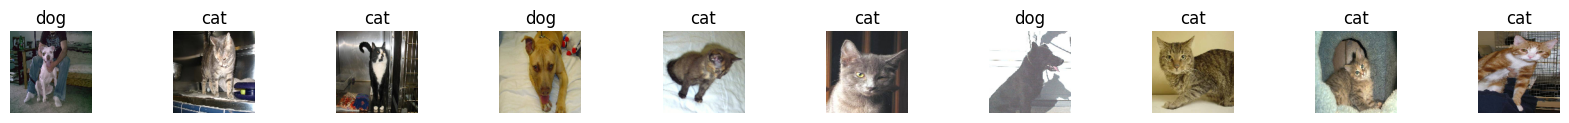

In [2]:
import matplotlib.pyplot as plt

CLASSES = np.array(['cat', 'dog'])

def show_images(images, labels, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    axes = axes.ravel()

    for i in range(num_images):
        index = np.random.randint(0, len(images))
        axes[i].imshow(images[index])
        axes[i].set_title(CLASSES[labels[index]], fontsize=12)
        axes[i].axis('off')

    plt.subplots_adjust(wspace=1)

# Undo the normalization for displaying purposes
x_train_display = (X_train * 255).astype('uint8')
y_train_display = y_train.argmax(axis=-1)

show_images(x_train_display, y_train_display)

In [18]:
# Сохранение модели
model.save('cat_dog_classifier.h5')

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


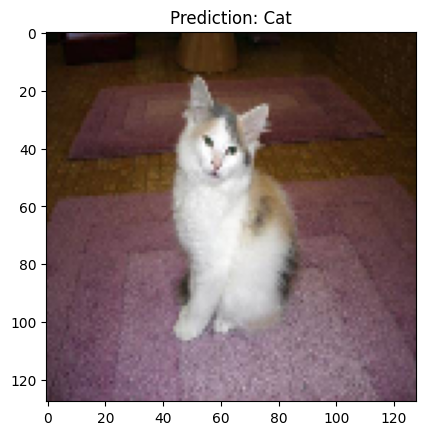

In [4]:

import tensorflow 
import keras
import keras.utils as image
from PIL import Image

image_folder_test = "C:/Users/Natalia/Desktop/Data Wizasrd/cats_and_dogs/test/10.jpg"

def predict_image(img_path):
    img = keras.utils.load_img(img_path, target_size= img_size)
    img_array = keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    class_label = 'Cat' if prediction[0][0] > prediction [0][1] else 'Dog'
    
    plt.imshow(img)
    plt.title(f'Prediction: {class_label}')
    plt.show()

predict_image(image_folder_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


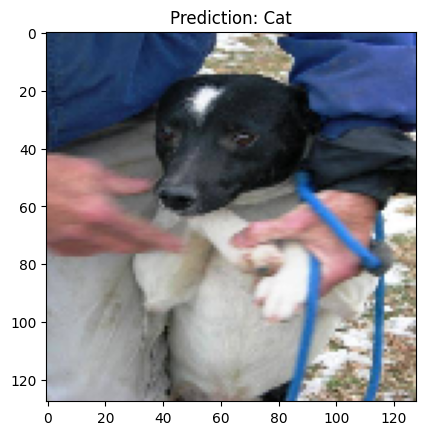

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


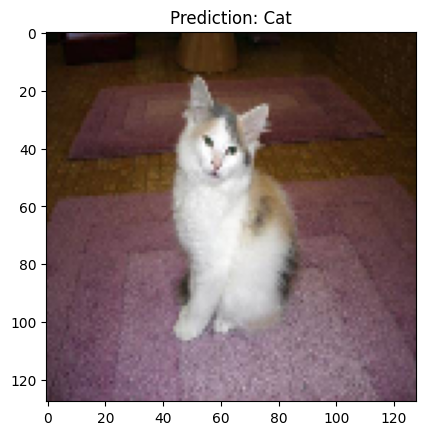

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


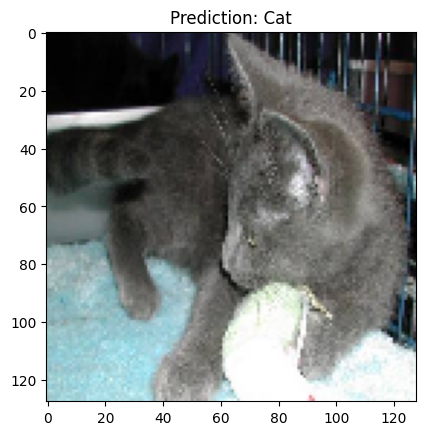

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


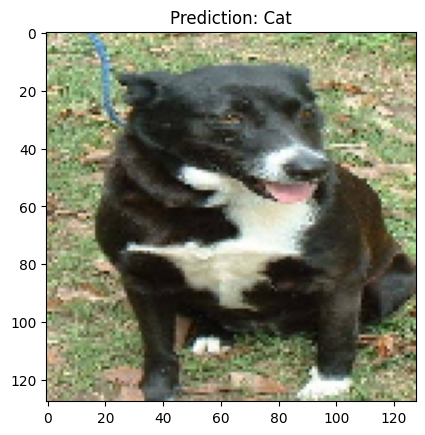

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


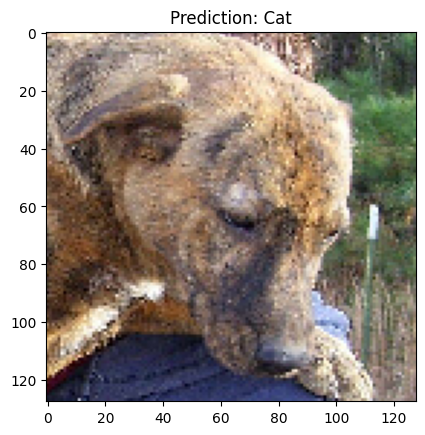

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


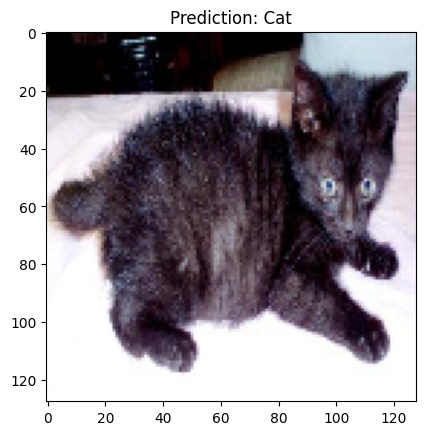

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [48]:
import os

def predict_images_in_folder(image_folder_path):
    for img_file in os.listdir(image_folder_path):
        img_path = os.path.join(image_folder_path, img_file)
        if img_path.endswith(('jpg', 'jpeg', 'png')):
            predict_image(img_path)

# Прогнозирование для всех изображений в папке
predict_images_in_folder('C:/Users/Natalia/Desktop/Data Wizasrd/cats_and_dogs/test')